### Names: Jared Miner and Jimmy Pronchick
### Instructor: Brian King
### Semester: CSCI 349 - Spring 2023

This notebook contains all of the analysis / modeling work for the project.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In our project, we will be examining trends in common Major League Baseball statistics across time using the dataset found at https://www.kaggle.com/datasets/joyshil0599/mlb-hitting-and-pitching-stats-through-the-years?resource=download. This dataset covers seasons from the late 1800s through 2022. In particular, we will be examining how recent trends in important measurements such as batting average, OBP, SLG, OPS, ERA, and WHIP may be affected by the new rule changes implemented this year in MLB, such as the addition of a pitch clock, wider bases, and a ban on shifts, which were all designed to speed up the game, and increase hits and stolen bases. 

In [2]:
df_hitting = pd.read_csv("../data/baseball_hitting.csv")

In [3]:
df_pitching = pd.read_csv("../data/baseball_pitcher.csv")

In [4]:
df_hitting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            2500 non-null   object 
 1   position               2500 non-null   object 
 2   Games                  2500 non-null   float64
 3   At-bat                 2500 non-null   float64
 4   Runs                   2500 non-null   float64
 5   Hits                   2500 non-null   float64
 6   Double (2B)            2500 non-null   float64
 7   third baseman          2500 non-null   float64
 8   home run               2500 non-null   float64
 9   run batted in          2500 non-null   float64
 10  a walk                 2500 non-null   float64
 11  Strikeouts             2500 non-null   object 
 12  stolen base            2500 non-null   float64
 13  Caught stealing        2500 non-null   object 
 14  AVG                    2500 non-null   float64
 15  On-b

In [5]:
df_pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player name         2575 non-null   object 
 1   Position            2575 non-null   object 
 2   Win                 2575 non-null   float64
 3   Loss                2575 non-null   float64
 4   Earned run Average  2575 non-null   float64
 5   Games played        2575 non-null   float64
 6   Games Started       2575 non-null   float64
 7   Complete Game       2575 non-null   float64
 8   Shutout             2575 non-null   float64
 9   Save                2575 non-null   float64
 10  Save Opportunity    2575 non-null   object 
 11  Innings pitched     2575 non-null   float64
 12  hit                 2575 non-null   float64
 13  run                 2575 non-null   float64
 14  earned run          2575 non-null   float64
 15  home run            2575 non-null   float64
 16   Hit B

In [6]:
df_hitting.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930


In [7]:
df_pitching.head()

,Player name,Position,Win,Loss,Earned run Average,Games played,Games Started,Complete Game,Shutout,Save,...,Innings pitched,hit,run,earned run,home run,Hit Batsmen,base on balls,Strikeouts,WHIP,AVG
0,N Ryan,P,324.0,292.0,3.19,807.0,773.0,222.0,61.0,3.0,...,5386.0,3923.0,2178.0,1911.0,321.0,158.0,2795.0,5714.0,1.25,0.204
1,R Johnson,P,303.0,166.0,3.29,618.0,603.0,100.0,37.0,2.0,...,4135.1,3346.0,1703.0,1513.0,411.0,190.0,1497.0,4875.0,1.17,0.221
2,R Clemens,P,354.0,184.0,3.12,709.0,707.0,118.0,46.0,0.0,...,4916.2,4185.0,1885.0,1707.0,363.0,159.0,1580.0,4672.0,1.17,0.229
3,S Carlton,P,329.0,244.0,3.22,741.0,709.0,254.0,55.0,2.0,...,5217.1,4672.0,2130.0,1864.0,414.0,53.0,1833.0,4136.0,1.25,0.24
4,B Blyleven,P,287.0,250.0,3.31,692.0,685.0,242.0,60.0,0.0,...,4970.0,4632.0,2029.0,1830.0,430.0,155.0,1322.0,3701.0,1.20,0.248


In [8]:
# Downcast float cols

float_cols_hitting = df_hitting.select_dtypes('float').columns

df_hitting[float_cols_hitting] = df_hitting[float_cols_hitting].apply(pd.to_numeric, downcast = "float")


In [9]:
# Downcast float cols
float_cols_pitching = df_pitching.select_dtypes('float').columns
df_pitching[float_cols_pitching] = df_pitching[float_cols_pitching].apply(pd.to_numeric, downcast = "float")

In [10]:
# Convert cells with -- entries to nan values

df_hitting = df_hitting.replace("--", None)
df_pitching = df_pitching.replace("--", None)

In [11]:
# count nan values
nan_count_hitting = df_hitting.isna().sum()
nan_count_pitching = df_pitching.isna().sum()

In [12]:
nan_count_hitting

Player name                8
position                   8
Games                      8
At-bat                     8
Runs                       8
Hits                       8
Double (2B)                8
third baseman              8
home run                   8
run batted in              8
a walk                     8
Strikeouts                20
stolen base                8
Caught stealing          200
AVG                        8
On-base Percentage         8
Slugging Percentage        8
On-base Plus Slugging     20
dtype: int64

In [13]:
nan_count_pitching

Player name             2
Position                2
Win                     2
Loss                    2
Earned run Average      2
Games played            2
Games Started           2
Complete Game           2
Shutout                 2
Save                    2
Save Opportunity      831
Innings pitched         2
hit                     2
run                     2
earned run              2
home run                2
 Hit Batsmen            2
base on balls          12
Strikeouts              2
WHIP                    2
AVG                    12
dtype: int64

In [14]:
# count num of missing rows

num_missing_rows_hitting = len(df_hitting) - len(df_hitting.dropna())

In [15]:
num_missing_rows_pitching = len(df_pitching) - len(df_pitching.dropna())

In [16]:
# Drop rows with any nan values

df_hitting = df_hitting.dropna()

In [17]:
df_pitching = df_pitching.dropna()

In [18]:
# Rename columns to make them easier to reference
df_hitting["Name"] = df_hitting["Player name"]
df_hitting["Pos"] = df_hitting["position"]
df_hitting["GP"] = df_hitting["Games"]
df_hitting["AB"] = df_hitting["At-bat"]
df_hitting["R"] = df_hitting["Runs"]
df_hitting["H"] = df_hitting["Hits"]
df_hitting["2B"] = df_hitting["Double (2B)"]
df_hitting["3B"] = df_hitting["third baseman"]
df_hitting["HR"] = df_hitting["home run"]
df_hitting["RBI"] = df_hitting["run batted in"]
df_hitting["BB"] = df_hitting["a walk"]
df_hitting["K"] = df_hitting["Strikeouts"]
df_hitting["SB"] = df_hitting["stolen base "]
df_hitting["CS"] = df_hitting["Caught stealing"]
df_hitting["OBP"] = df_hitting["On-base Percentage"]
df_hitting["SLG"] = df_hitting["Slugging Percentage"]
df_hitting["OPS"] = df_hitting['On-base Plus Slugging']

df_hitting = df_hitting.drop(columns = ['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'])


In [19]:
# Set index as player name

#df_hitting = df_hitting.set_index(df_hitting.loc[:,"Name"])
df_hitting = df_hitting.set_index("Name")

In [20]:
# Rename columns to make them easier to reference
df_pitching["Name"] = df_pitching["Player name"]
df_pitching["Pos"] = df_pitching["Position"]
df_pitching["GP"] = df_pitching["Games played"]
df_pitching["W"] = df_pitching["Win"]
df_pitching["L"] = df_pitching["Loss"]
df_pitching["ERA"] = df_pitching["Earned run Average"]
df_pitching["GS"] = df_pitching["Games Started"]
df_pitching["CG"] = df_pitching["Complete Game"]
df_pitching["STO"] = df_pitching["Shutout"]
df_pitching["SV"] = df_pitching["Save"]
df_pitching["SVO"] = df_pitching["Save Opportunity"]
df_pitching["IP"] = df_pitching["Innings pitched"]
df_pitching["H"] = df_pitching["hit"]
df_pitching["R"] = df_pitching["run"]
df_pitching["ER"] = df_pitching["earned run"]
df_pitching["HR"] = df_pitching["home run"]
df_pitching["HBP"] = df_pitching[" Hit Batsmen"]
df_pitching["BB"] = df_pitching['base on balls']
df_pitching["K"] = df_pitching['Strikeouts']

df_pitching = df_pitching.drop(columns = ['Player name', 'Position', 'Win', 'Loss', 'Earned run Average',
       'Games played', 'Games Started', 'Complete Game', 'Shutout', 'Save',
       'Save Opportunity', 'Innings pitched', 'hit', 'run', 'earned run',
       'home run', ' Hit Batsmen', 'base on balls', 'Strikeouts'])


In [21]:
# Set index as player name

#df_pitching = df_pitching.set_index(df_pitching.loc[:,"Name"])
df_pitching = df_pitching.set_index("Name")

In [22]:
df_hitting.index.unique()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2184)

In [23]:
df_hitting.index

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'C Dickerson', 'E Wynn', 'J Smith', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2296)

In [24]:
df_hitting.index.drop_duplicates()

Index(['B Bonds', 'H Aaron', 'B Ruth', 'A Pujols', 'A Rodriguez', 'W Mays',
       'K Griffey', 'J Thome', 'S Sosa', 'F Robinson',
       ...
       'S Livingstone', 'E Burton', 'E Wynn', 'C Donnels', 'R Theriot',
       'J Bowker', 'K Garlick', 'J Bucher', 'R Derry', 'L Niekro'],
      dtype='object', name='Name', length=2184)

In [25]:
df_pitching.index.unique()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1698)

In [26]:
df_pitching.index

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Santiago', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1746)

In [27]:
df_pitching.index.drop_duplicates()

Index(['N Ryan', 'R Johnson', 'R Clemens', 'S Carlton', 'B Blyleven',
       'T Seaver', 'D Sutton', 'G Perry', 'G Maddux', 'P Niekro',
       ...
       'J Roa', 'E Butler', 'D Eiland', 'E Goeddel', 'B Munoz', 'J Machi',
       'B Martin', 'E Bell', 'D Ponce de Leon', 'R Hinton'],
      dtype='object', name='Name', length=1698)

For the modeling part of the project, I think that it will be most helpful to use clustering techniques to try to group similar players together, which may more easily show trends in the data. Some basic machine learning methods, such as k-means classification, may also be helpful.

Our overarching aim of the project, besides just finding interesting trends in a large baseball dataset, is to try to find useful trends to be able to predict how rule changes will affect future MLB seasons.

In [28]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score,homogeneity_completeness_v_measure
from scipy.cluster import hierarchy

In [29]:
df_bullpen = pd.concat([df_pitching.GP,df_pitching.IP], axis=1)

In [30]:
def run_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df)
    labels = kmeans.predict(df)
    bullpen_cluster = kmeans.transform(df)
    return labels

C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jpron\anaconda3\envs\csci349\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

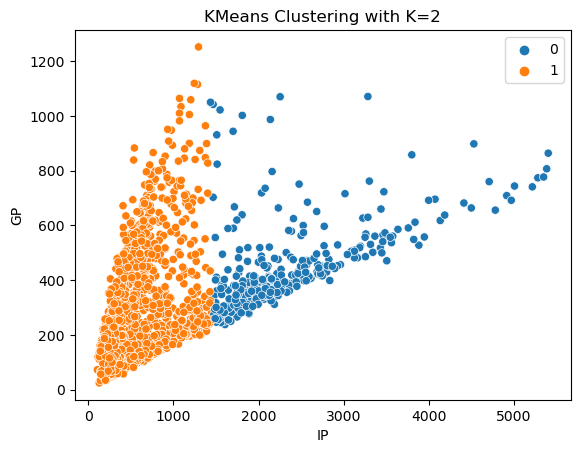

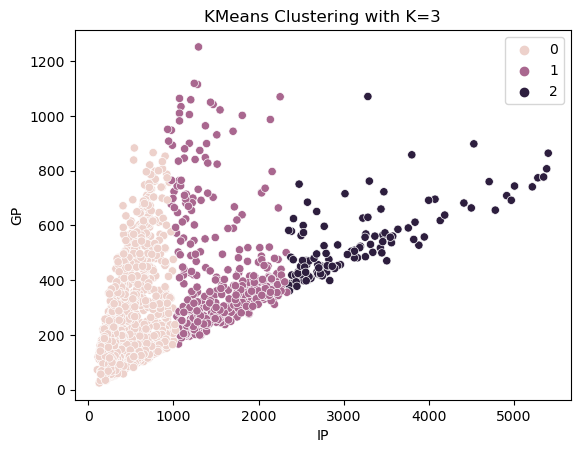

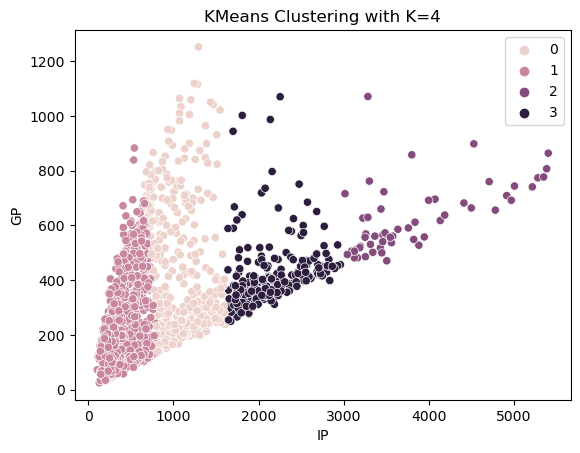

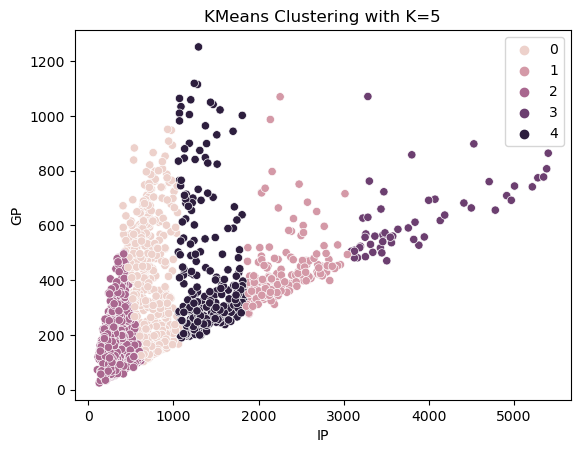

In [31]:
for i in range(2,6,1):
    labels=run_kmeans(df_bullpen,i)
    plt.figure()
    sns.scatterplot(x=df_bullpen.IP,y=df_bullpen.GP, hue=labels)
    plt.title("KMeans Clustering with K={}".format(i))

In [32]:
df_hitting_numeric = pd.concat([df_hitting.AVG,df_hitting.iloc[:, 2:]],axis=1)

In [81]:
# set up kmeans model

def run_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(df)
    labels = kmeans.predict(df)
    hitting_cluster = kmeans.transform(df)
    return labels

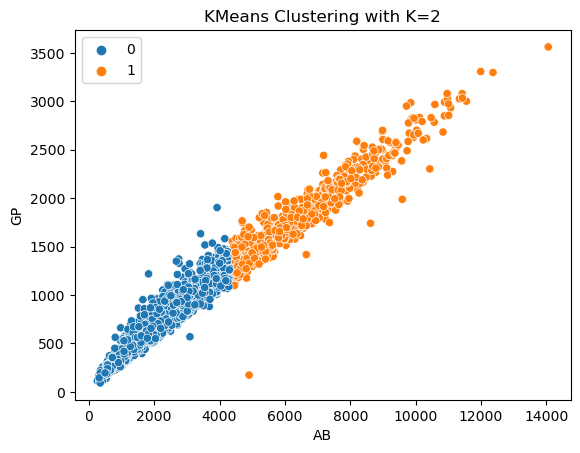

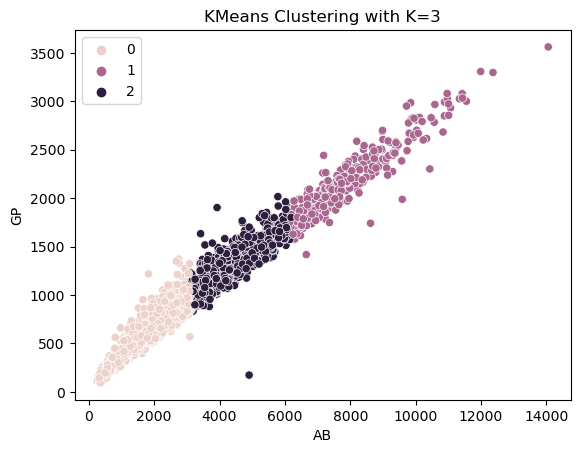

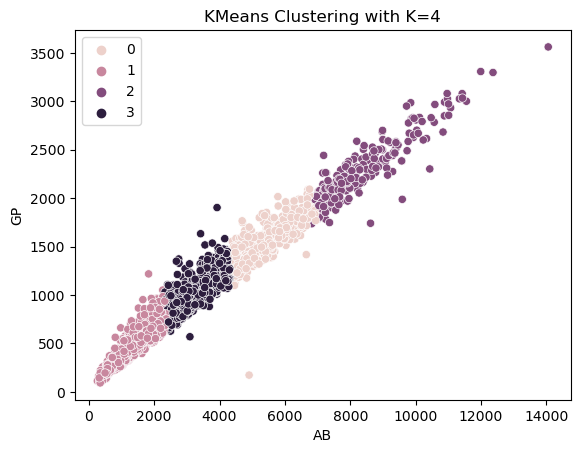

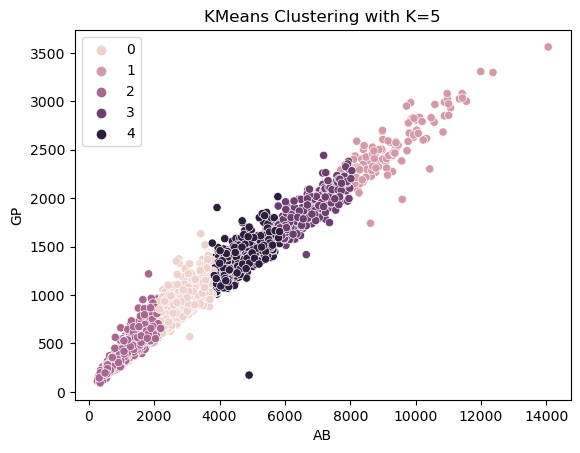

In [85]:
# run model with k = 2, 3, 4, 5

# clustering AVG by GP

for i in range(2,6,1):
    labels=run_kmeans(df_hitting_numeric,i)
    plt.figure()
    sns.scatterplot(x=df_hitting_numeric.AB,y=df_hitting_numeric.GP, hue=labels)
    plt.title("KMeans Clustering with K={}".format(i))

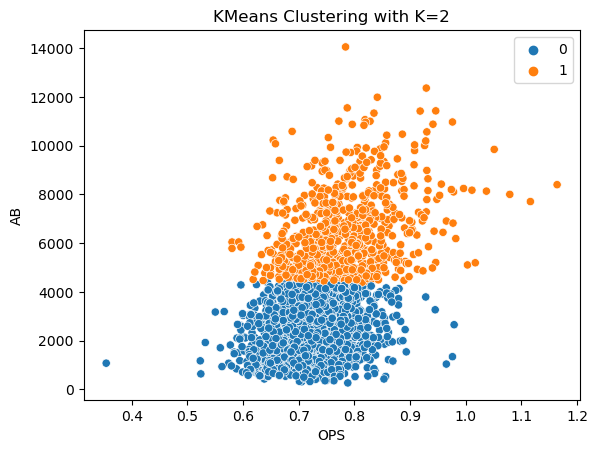

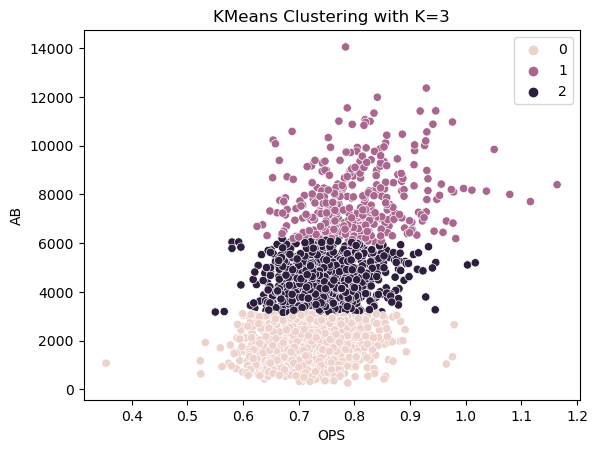

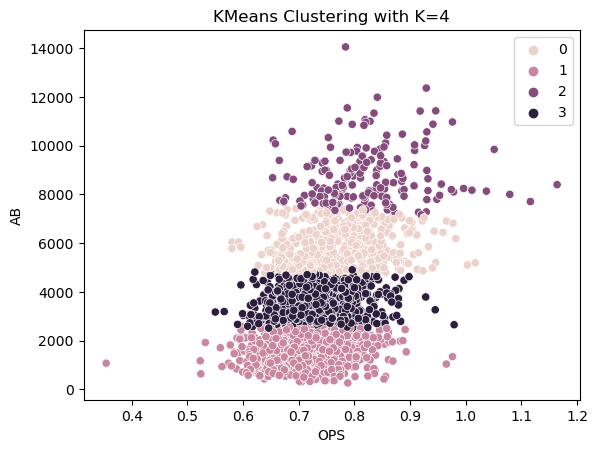

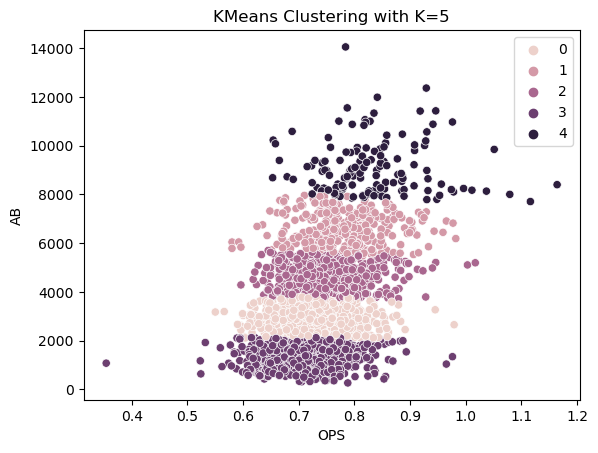

In [83]:
# run model with k = 2, 3, 4, 5

# clustering OPS by AB

for i in range(2,6,1):
    labels=run_kmeans(df_hitting_numeric,i)
    plt.figure()
    sns.scatterplot(x=df_hitting_numeric.OPS,y=df_hitting_numeric.AB, hue=labels)
    plt.title("KMeans Clustering with K={}".format(i))

In [ ]:
# Hierarchical Clustering

In [233]:
def run_hierarchical(df, n_clusters):
    agg = AgglomerativeClustering(n_clusters=n_clusters,metric='l2',linkage='complete',compute_distances=True).fit(df)
    labels=agg.labels_
    dist_mat=agg.distances_
    return dist_mat, labels

In [80]:
df_pitching_numeric = df_pitching.drop(["Pos"],axis=1)

In [37]:
from scipy.spatial.distance import pdist

In [236]:
# sns.clustermap(df_hitting_numeric)

ValueError: Linkage matrix 'Z' must have shape=2 (i.e. be two-dimensional).

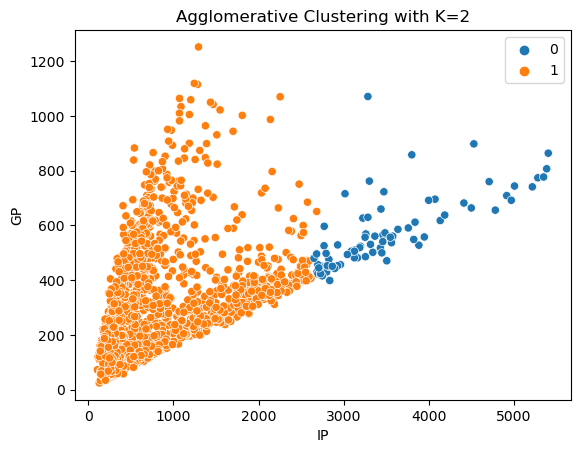

<Figure size 640x480 with 0 Axes>

In [237]:
for i in range(2,6,2):
    dist_mat,labels=run_hierarchical(df_bullpen,i)
    plt.figure()
    sns.scatterplot(x=df_bullpen.IP,y=df_bullpen.GP, hue=labels)
    plt.title("Agglomerative Clustering with K={}".format(i))
    # Z=linkage((dist_mat))
   
    plt.figure()
    dn = dendrogram(dist_mat)
    plt.show()

In [238]:
from sklearn.cluster import DBSCAN

In [239]:
def run_DBscan(df, eps):
    labels = DBSCAN(eps=eps).fit_predict(df)
    return labels

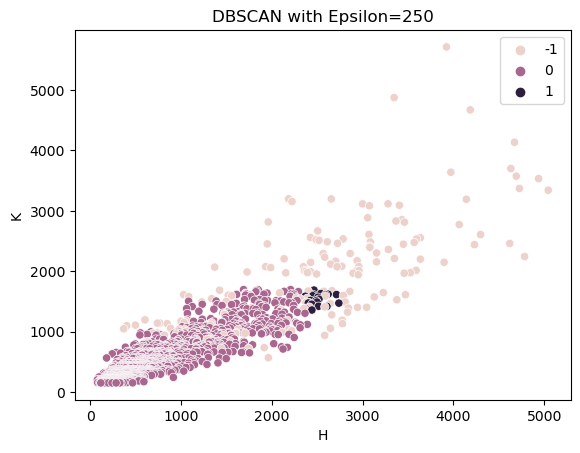

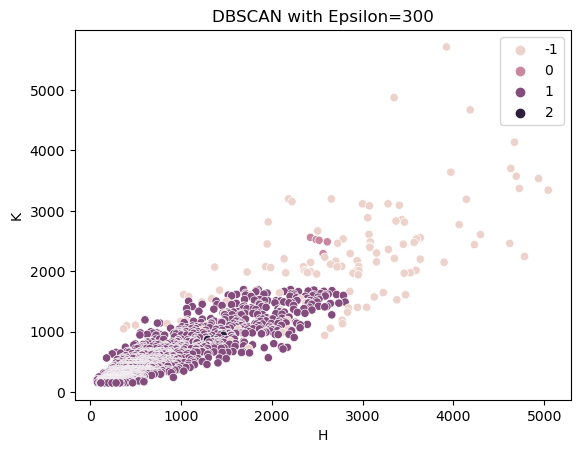

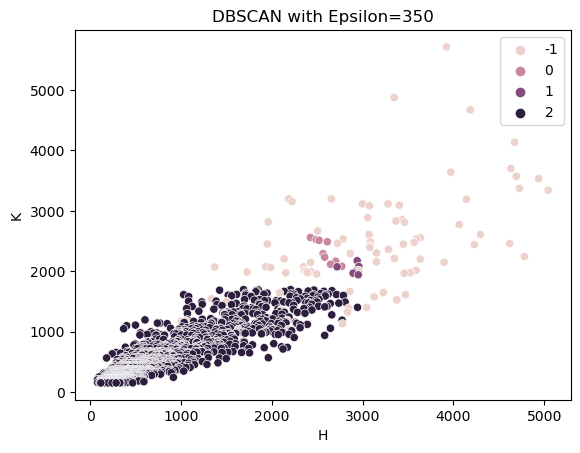

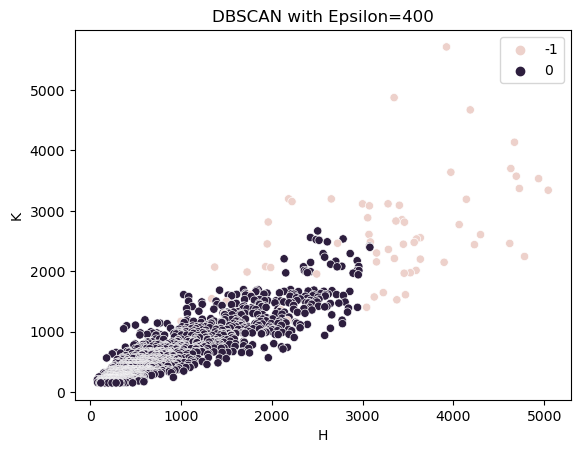

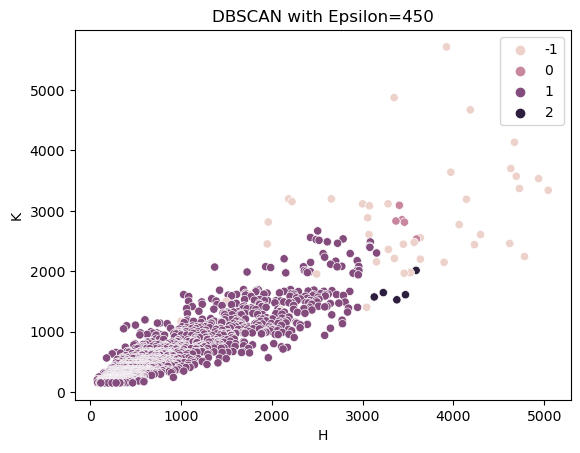

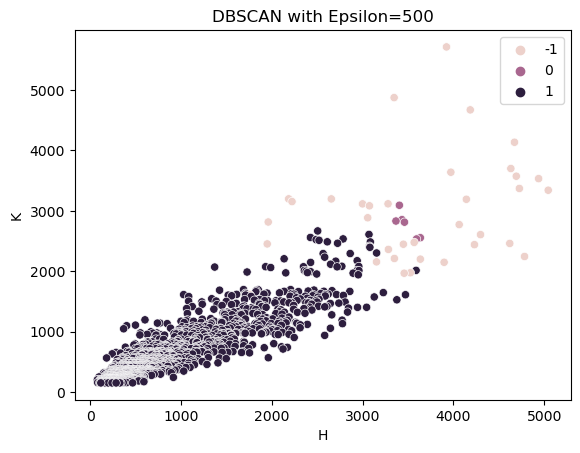

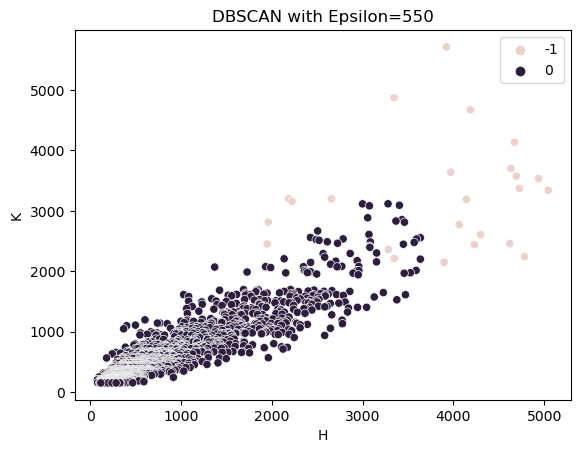

In [240]:
for i in range(250,600,50):
    labels=run_DBscan(df_pitching_numeric,i)
    plt.figure()
    sns.scatterplot(x=df_pitching_numeric.H,y=df_pitching_numeric.K, hue=labels)
    plt.title("DBSCAN with Epsilon={}".format(i))

In [242]:
from sklearn.metrics import pairwise_distances
def k_nearest_neighbors(df, k):
    
    dist_mat=pd.DataFrame(pairwise_distances(df),
                      index=df.index,columns=df.index)

    distances = dist_mat.melt(value_vars=dist_mat.columns)
    distances.rename(columns={'value':'distance'},inplace=True)
    distances=distances.where(distances.distance>0.01).sort_values(by=['Name','distance']).dropna() #sorts by player name and then distance to other players
    k_nearest=distances.groupby(by='Name').nth(n=k) #every player's kth nearest neighbor
    return k_nearest

In [33]:
for i in range(1,10,1):
    plt.figure()
    sns.histplot(k_nearest_neighbors(df_pitching_numeric,i),bins=5)
    plt.ylabel('Count')
    plt.xlabel('Epsilon distance distribtion for {} nearest neighbors'.format(i))

Name,N Ryan,R Johnson,R Clemens,S Carlton,B Blyleven,T Seaver,D Sutton,G Perry,G Maddux,P Niekro,...,J Santiago,E Butler,D Eiland,E Goeddel,B Munoz,J Machi,B Martin,E Bell,D Ponce de Leon,R Hinton
Name,,,,,,,,,,,,,,,,,,,,,
N Ryan,0.000000,2185.396436,1737.286640,2010.246049,2638.714653,2665.558915,2707.165715,2796.363677,3096.917072,2815.552635,...,9242.777256,9258.048213,9106.313722,9473.466799,9249.500386,9416.590047,9396.716767,9324.179068,9462.518839,9302.488224
R Johnson,2185.396436,0.000000,1207.725710,1992.358153,2002.079881,1543.892394,2289.858730,2491.119233,2315.215545,2776.576492,...,7287.894290,7303.944538,7152.607937,7515.873129,7296.196504,7459.157728,7438.784717,7370.763615,7506.921827,7346.699477
R Clemens,1737.286640,1207.725710,0.000000,895.189236,1130.339974,1128.214993,1333.352451,1490.168825,1532.271384,1778.093467,...,8075.430964,8094.742932,7928.190969,8324.504198,8085.990214,8262.206300,8239.914670,8168.125930,8315.602286,8140.208906
S Carlton,2010.246049,1992.358153,895.189236,0.000000,734.830231,1209.774389,759.749968,815.752424,1181.265430,946.948793,...,8358.164566,8377.421255,8199.983305,8622.874472,8368.452833,8557.202397,8532.850012,8455.893289,8612.992295,8426.304421
B Blyleven,2638.714653,2002.079881,1130.339974,734.830231,0.000000,846.315530,393.281677,542.877633,516.474243,943.503525,...,7859.483072,7879.818243,7696.832728,8130.225415,7870.975236,8062.855293,8037.513674,7960.958375,8121.003505,7929.085205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J Machi,9416.590047,7459.157728,8262.206300,8557.202397,8062.855293,7424.455811,8282.901053,8436.558204,7930.320210,8633.169608,...,236.879479,265.817839,459.549762,91.815632,258.431835,0.000000,45.449663,194.049882,156.345564,187.139910
B Martin,9396.716767,7438.784717,8239.914670,8532.850012,8037.513674,7401.456369,8257.809717,8410.979106,7904.595208,8606.960161,...,204.619836,229.875425,422.434404,117.119787,222.350626,45.449663,0.000000,165.951191,165.202434,150.914123
E Bell,9324.179068,7370.763615,8168.125930,8455.893289,7960.958375,7327.005754,8180.983574,8334.500298,7829.781822,8527.479079,...,204.383746,101.938294,314.629561,219.469596,110.155444,194.049882,165.951191,0.000000,185.870252,75.796417


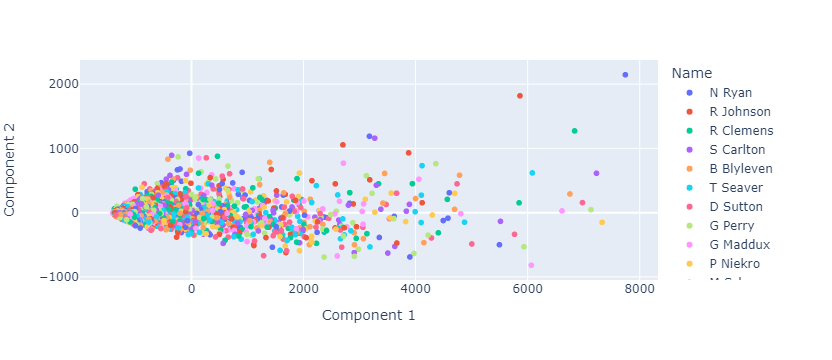

In [39]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components='mle',svd_solver='full').fit(df_pitching_numeric)
X=pd.DataFrame(PCA(n_components=len(df_pitching_numeric.columns)).fit_transform(df_pitching_numeric),index=df_pitching_numeric.index)
X.columns+=1
X=X.rename(columns= 'Component {}'.format)

fig = px.scatter(X, x=X.loc[:,'Component 1'],y=X.loc[:,'Component 2'],color=X.index)
fig.show()

In [283]:
print("These two components account for {:.2f}% of the variance in the data".format(pca.explained_variance_ratio_[:2].sum()*100))

These two components account for 97.50% of the variance in the data


In [265]:
# import plotly.express as px
# fig = px.scatter_3d(X, x='Component 1', y='Component 2', z='Component 3',color=X.index)
# fig.show()

Text(0.5, 0.98, 'Contact vs. Strikeout')

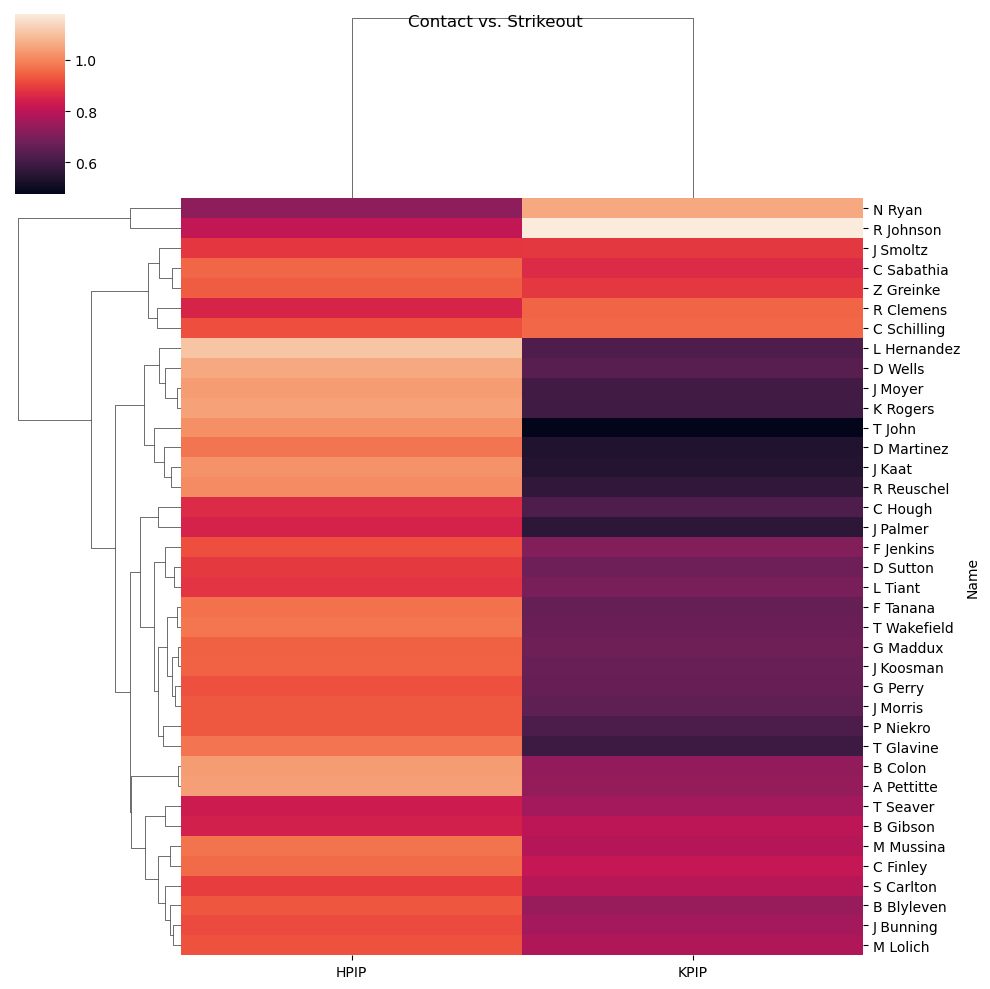

In [75]:
pca = PCA(n_components='mle',svd_solver='full').fit(df_pitching_numeric)
X=pd.DataFrame(PCA(n_components=len(df_pitching_numeric.columns)).fit_transform(df_pitching_numeric),index=df_pitching_numeric.index)
X.columns+=1
X=X.rename(columns= 'Component {}'.format)


best_pitchers=X[X.loc[:,'Component 1']>4000]
df_best_pitchers=df_pitching_numeric.loc[best_pitchers.index]
df_best_pitchers['KPIP']=df_best_pitchers.K/df_best_pitchers.IP #strikeouts per inning pitched
df_best_pitchers['HPIP']=df_best_pitchers.H/df_best_pitchers.IP #hits per inning pitched

sns.clustermap(df_best_pitchers.loc[:, ["HPIP", "KPIP"]]).fig.suptitle("Contact vs. Strikeout")

This clustermap, which is filtered to include only the generally best pitchers in the dataset using the first principal component, shows pitchers that struck batters out an exceptionally high rate vs pitchers that allowed more contact. Every player in this set is extremely successful, but some were impossible to hit and stuck everyone out, like Randy Johnson or Nolan Ryan, and others were masters of pitching for weak contact, like Greg Maddux.

Text(0.5, 0.98, 'Wild, Slow, or Otherwise Often Stolen-on Pitchers')

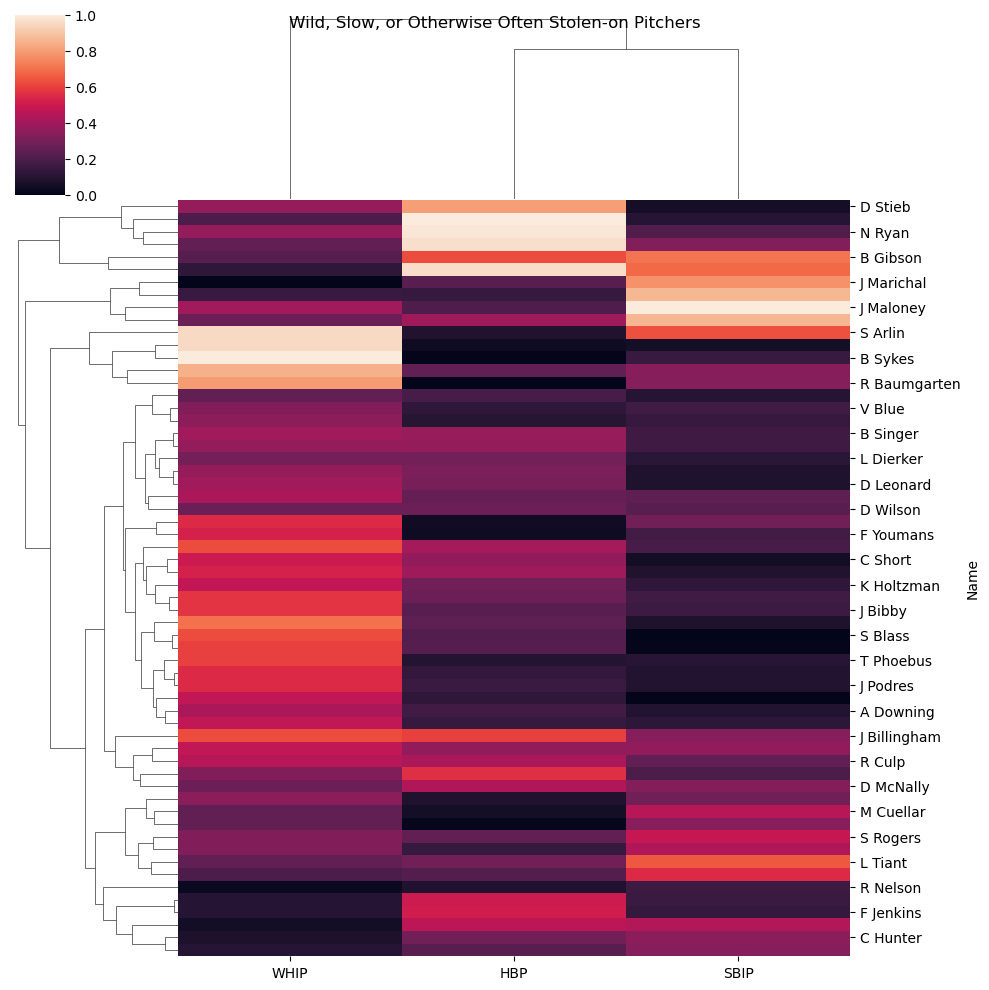

In [96]:
df_pitching_numeric['SBIP']=df_pitching_numeric.STO/df_pitching_numeric.IP #steals allowed per innings pitched
df_steals=df_pitching_numeric[df_pitching_numeric.SBIP>.01] #pitchers who are stolen on the most

sns.clustermap(df_steals.loc[:, ["HBP","SBIP","WHIP"]],standard_scale=1).fig.suptitle("Wild, Slow, or Otherwise Often Stolen-on Pitchers")

This clustermap shows pitchers who were stolen on at the highest rate. Some likely threw a higher number of wild pitches, evidenced by their HBP numbers. Others allowed more batters on base, evidenced by a higher WHIP. Some fit into both of these characters. The ones who fit into neither likely have a slow delivery, low velocity, or played with a lot of poor catchers/fielders.

In [97]:
df_pitching_numeric.loc['R Nelson']

WHIP           1.11
AVG           0.224
GP            135.0
W              29.0
L              32.0
ERA            3.06
GS             77.0
CG             20.0
STO             7.0
SV              4.0
SVO               4
IP       636.099976
H             516.0
R             234.0
ER            216.0
HR             44.0
HBP            17.0
BB            190.0
K             371.0
SBIP       0.011005
HBPIP      0.026725
Name: R Nelson, dtype: object